In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

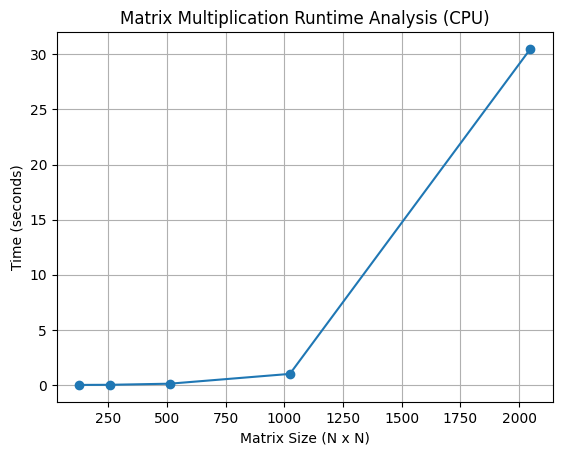

In [23]:
data = pd.read_csv('./data/runtime_data.csv')
cpu_data = data[data['Implementation'] == 'CPU (C)']
Ns = np.array(cpu_data.columns[1:]).astype(np.float32)
times = cpu_data.values[0][1:]
    
plt.plot(Ns, times, marker='o')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Runtime Analysis (CPU)')
plt.grid(True)
plt.show()

In [ ]:
data = pd.read_csv('./data/runtime_data.csv')
cpu_data = data[data['Implementation'] == 'Naive CUDA']
Ns = np.array(cpu_data.columns[1:]).astype(np.float32)
times = cpu_data.values[0][1:]
    
plt.plot(Ns, times, marker='o')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Time (seconds)')
plt.title('Naive Matrix Multiplication Runtime Analysis (GPU)')
plt.grid(True)
plt.show()